Applications of Spectral Theory:

- Spectral Clustering

- Eigenvector Centralities

Quick introduction to Graph Theory and Complex Networks

- A graph denoted as $G = (V,E)$, is defined by a set of verticies $V = \{v_1, v_2, ..., v_n\}$ and edges $E = \{e_1, e_2,...,e_n\}$.

- Two vertices $v_1, v_2$ are connected together $\iff \exists$ a sequence of edges $<e_1, e_2, .., e_{k-1}>$, such that $v_1 \in e_1$ and $v_k \in e_{k-1}$

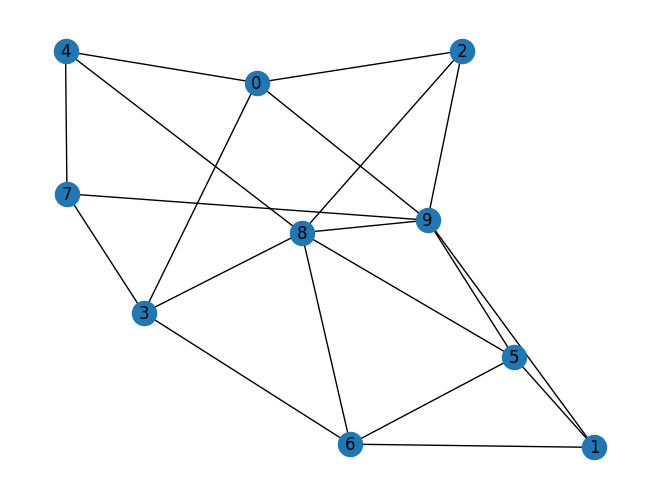

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

K=nx.erdos_renyi_graph(10,0.50)
nx.draw(K, with_labels=True)

Spectral Clustering

1. Start with an adjacency matrix of the generated graph

In [63]:
A = nx.to_numpy_array(K)
A

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 1., 0.]])

2. Establish a diagonal matrix, $D$, which is the sum of the rows:

In [64]:
import numpy as np
D = np.diag(A.sum(axis=1))
D

array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 6., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 6.]])

3. Determine $D^{\frac{-1}{2}} = d_{ii}^{\frac{-1}{2}}$,

In [65]:
from numpy import inf
D_squared = 1/np.sqrt(D)
D_squared[D_squared == inf] = 0
D_squared

/var/folders/bw/7qdh0ynx0c9bf8j9_sfpt8fw0000gn/T/ipykernel_63514/2675068805.py:2: RuntimeWarning: divide by zero encountered in divide
  D_squared = 1/np.sqrt(D)


array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

4. Get the normalized Laplacian graph $L = I_n - D^{\frac{-1}{2}}AD^{\frac{1}{2}}$

In [66]:
I_n = np.identity(10)
L = I_n - np.matmul(np.matmul(D_squared,A),D_squared)
L

array([[ 1.        ,  0.        , -0.28867513, -0.25      , -0.28867513,
         0.        ,  0.        ,  0.        ,  0.        , -0.20412415],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        -0.28867513, -0.28867513,  0.        ,  0.        , -0.23570226],
       [-0.28867513,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.23570226, -0.23570226],
       [-0.25      ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -0.25      , -0.28867513, -0.20412415,  0.        ],
       [-0.28867513,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        , -0.33333333, -0.23570226,  0.        ],
       [ 0.        , -0.28867513,  0.        ,  0.        ,  0.        ,
         1.        , -0.25      ,  0.        , -0.20412415, -0.20412415],
       [ 0.        , -0.28867513,  0.        , -0.25      ,  0.        ,
        -0.25      ,  1.        ,  0.        

5. Get the eigenvectors and eigenvalues of the graph Laplacian

In [67]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(L)

In [68]:
eigenvalues

array([-2.77555756e-16,  4.64393113e-01,  1.78184855e+00,  7.15058266e-01,
        8.60287876e-01,  9.74134156e-01,  1.05999526e+00,  1.27791834e+00,
        1.46964747e+00,  1.39671698e+00])

In [69]:
eigenvectors

array([[-0.31622777,  0.36840923,  0.4369838 , -0.23579017, -0.14961392,
         0.34436455, -0.53310152,  0.27871734,  0.11075565, -0.05103063],
       [-0.27386128, -0.45937022,  0.10335124, -0.04386249,  0.3071872 ,
         0.20086535, -0.28961251, -0.4017872 , -0.48371884, -0.29558494],
       [-0.27386128,  0.18212361, -0.18945327, -0.5553913 , -0.27693657,
         0.02546018,  0.17385049, -0.38468771, -0.25043417,  0.47875983],
       [-0.31622777,  0.15040943, -0.39729846,  0.45087162, -0.34282385,
         0.44372465,  0.20476664,  0.19582438, -0.30420364, -0.17032188],
       [-0.27386128,  0.38485006, -0.45379429,  0.20320686,  0.22298363,
        -0.48827854, -0.47410608, -0.12783135,  0.0127452 , -0.0158316 ],
       [-0.31622777, -0.4447016 , -0.06680413, -0.04365507,  0.12666524,
        -0.19798311, -0.06200941,  0.64143731, -0.17584256,  0.44093416],
       [-0.31622777, -0.39180823,  0.01345116,  0.31330975, -0.29950554,
         0.08965994, -0.14767342, -0.34076077

- The second eigenvector of the Laplacian graph provides important information about the graph itself:

- It indicates the best cut of the graph.

- We can create a set of vertices such that $S = {v_i \in V|u_2(v)i)<0}$, followed by $T=V\textbackslash S$, creating two groups, one in set $S$, the other in set $T$.

In [70]:
eigenvectors[:, 1]

array([ 0.36840923, -0.45937022,  0.18212361,  0.15040943,  0.38485006,
       -0.4447016 , -0.39180823,  0.31205825, -0.01799583, -0.01935605])

- Nodes 1,3,4,5 and 8 belongs to the same clusters, while nodes 2, 6, 7, 9 and 10 belongs to another cluster.

Assignment

- Read about spectral clustering module in Python's Scikit Learn Package.

- Choose a dataset from https://datasetsearch.research.google.com/.

- Perform spectral clustering from your chosen dataset, derive conclusions from the result.

- NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

- Push your codes to your github account. 

Eigenvector Centrality

- In graph theory, eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

- Eigen

In [73]:
centrality = nx.eigenvector_centrality(K)
centrality

{0: 0.2876355714244018,
 1: 0.253989577831513,
 2: 0.27218265678299575,
 3: 0.29790693027640525,
 4: 0.22415117792508008,
 5: 0.3380170959356353,
 6: 0.3133051686761221,
 7: 0.22356013979379064,
 8: 0.44096454212820196,
 9: 0.4275919020468911}

In [78]:
eigenvalues, eigenvectors = LA.eig(A)

In [79]:
eigenvalues

array([ 4.24785809, -3.13154173,  1.86942436, -1.91573914, -1.56963994,
       -1.        ,  1.08840459, -0.22035826,  0.10610804,  0.52548398])

In [82]:
eigenvectors[:, 0]

array([-0.28763455, -0.25399062, -0.27218211, -0.29790653, -0.22415028,
       -0.33801816, -0.31330612, -0.22355941, -0.4409646 , -0.42759184])

Eigenvector Centrality Assignment 1

Given the following graph below, find it eigenvector centrality:

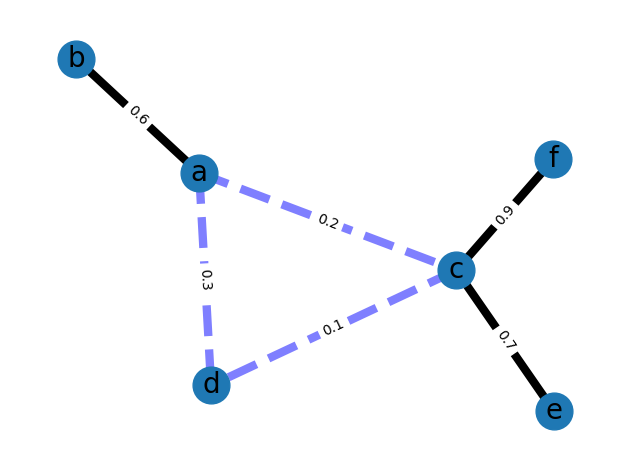

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Eigenvector Centrality:
a: 0.51807347662071
b: 0.21182192277183212
c: 0.5986761070959697
d: 0.4566010978754134
e: 0.24477918831750853
f: 0.24477918831750853


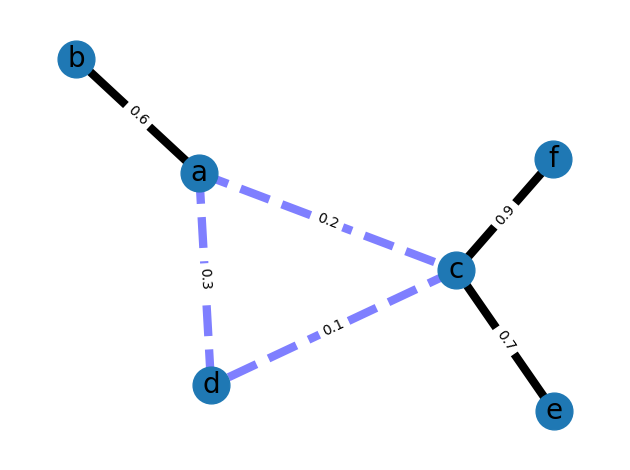

Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.